In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [4]:
data = pd.read_csv("tripadvisor_review.csv")
data

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [5]:
data.rename(columns={'User ID': 'User'}, inplace=True) 
data.rename(columns={'Category 1': 'Galleries'}, inplace=True) 
data.rename(columns={'Category 2': 'Dance_clubs'}, inplace=True) 
data.rename(columns={'Category 3': 'Juice_bars'}, inplace=True) 
data.rename(columns={'Category 4': 'Restaurants'}, inplace=True) 
data.rename(columns={'Category 5': 'Museums'}, inplace=True) 
data.rename(columns={'Category 6': 'Resorts'}, inplace=True) 
data.rename(columns={'Category 7': 'Parks'}, inplace=True) 
data.rename(columns={'Category 8': 'Beaches'}, inplace=True) 
data.rename(columns={'Category 9': 'Tehaters'}, inplace=True) 
data.rename(columns={'Category 10': 'Religious_institutions'}, inplace=True) 

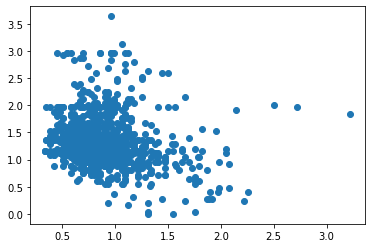

In [7]:
plt.scatter(data['Galleries'],data['Dance_clubs'])

In [8]:
data


,User,Galleries,Dance_clubs,Juice_bars,Restaurants,Museums,Resorts,Parks,Beaches,Tehaters,Religious_institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [20]:
y_predicted = km.fit_predict(data[['Galleries','Dance_clubs']])
y_predicted

array([1, 3, 0, 1, 2, 2, 2, 2, 1, 2, 0, 3, 1, 1, 1, 3, 2, 1, 2, 2, 1, 1,
       2, 1, 0, 3, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1,
       1, 0, 2, 2, 3, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0,
       2, 2, 2, 1, 0, 2, 3, 2, 0, 3, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2,
       3, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 3,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 0, 2, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 0, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 3,
       1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 0, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2,

In [21]:
data['cluster'] = y_predicted

In [22]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]


Text(0, 0.5, 'Dance_clubs')

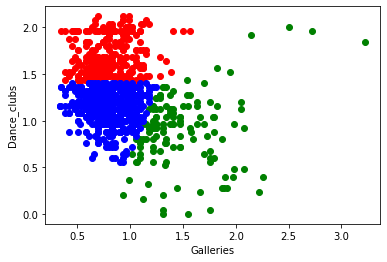

In [23]:
plt.scatter(df1.Galleries,df1['Dance_clubs'],color='green')
plt.scatter(df2.Galleries,df2['Dance_clubs'],color='red')
plt.scatter(df3.Galleries,df3['Dance_clubs'],color='blue')

plt.xlabel('Galleries')
plt.ylabel('Dance_clubs')


In [24]:
k_rng = range(1,5)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Galleries','Dance_clubs']])
    sse.append(km.inertia_)

C:\Users\Chenxi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [25]:
sse

[328.57541581632626, 195.1497420309212, 131.65957936718732, 103.34074484939025]

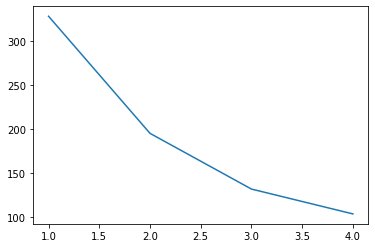

In [26]:
plt.plot(k_rng,sse)

In [29]:
km.cluster_centers_

array([[0.79722603, 1.70452055],
       [0.79121032, 1.13952381],
       [1.48398496, 0.89533835],
       [0.90980392, 2.63607843]])

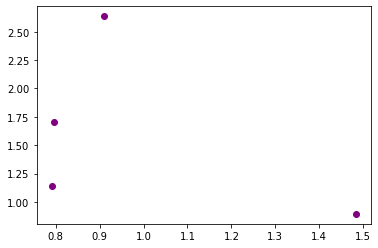

In [39]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',label='centroid')

In [12]:
###Hierachical clustering
data

,User,Galleries,Dance_clubs,Juice_bars,Restaurants,Museums,Resorts,Parks,Beaches,Tehaters,Religious_institutions,cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,2
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,0
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,2
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,0
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,2


In [13]:
data = data.drop(columns=['User'], axis =1)

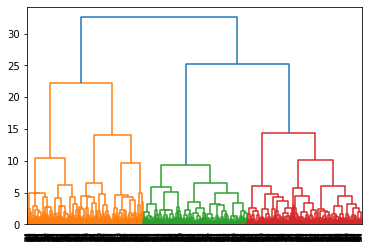

In [14]:
dendogram = sch.dendrogram(sch.linkage(data, method ='ward'))